# 01 - Olist E-Commerce: Data Exploration

## Objectives
1. Load all 8 datasets
2. Understand table relationships
3. Check data quality
4. Initial exploratory analysis
5. Validate data model

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

'''
1. sns.set_style('whitegrid')
What it does: Chooses the seaborn style 'whitegrid'.
Effect: All later seaborn/matplotlib plots in the session get:
White background
Light gray grid lines (easier to read values)
No top/right spines by default (cleaner look)
Other options: 'darkgrid', 'dark', 'white', 'ticks'.
'''
sns.set_style('whitegrid')

#----------------------------------------------------------------------------------------------------
'''plt.rcParams['figure.figsize'] = (14, 6)
What it does: Sets the default size for new figures.
Meaning: (14, 6) = 14 inches wide, 6 inches tall (unless you override it in a specific plot).
Effect: Plots are wider and easier to read without calling figsize= every time.'''
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load All Datasets

In [7]:
# Define file paths with trailing slash for proper joining
import os

data_path = r"D:\About ME\Digital hub_data analysis\Olist E-Commerce"
if not data_path.endswith(os.sep):
    data_path += os.sep

# List of datasets: (variable name, filename)
datasets = [
    ("customers", "olist_customers_dataset.csv"),
    ("orders", "olist_orders_dataset.csv"),
    ("order_items", "olist_order_items_dataset.csv"),
    ("products", "olist_products_dataset.csv"),
    ("payments", "olist_order_payments_dataset.csv"),
    ("reviews", "olist_order_reviews_dataset.csv"),
    ("sellers", "olist_sellers_dataset.csv"),
    ("geolocation", "olist_geolocation_dataset.csv"),
]

# Load all 8 datasets
print("Loading datasets...\n")

loaded = {}
for var, fname in datasets:
    file_path = os.path.join(data_path, fname)
    try:
        loaded[var] = pd.read_csv(file_path)
        print(f"✓ {var.capitalize()}: {loaded[var].shape}")
    except FileNotFoundError:
        print(f"X File not found: {file_path}")

# Unpack loaded datasets into variables for compatibility with later code
customers     = loaded.get("customers",     pd.DataFrame())
orders        = loaded.get("orders",        pd.DataFrame())
order_items   = loaded.get("order_items",   pd.DataFrame())
products      = loaded.get("products",      pd.DataFrame())
payments      = loaded.get("payments",      pd.DataFrame())
reviews       = loaded.get("reviews",       pd.DataFrame())
sellers       = loaded.get("sellers",       pd.DataFrame())
geolocation   = loaded.get("geolocation",   pd.DataFrame())

if all(df.shape[0] > 0 for df in loaded.values()):
    print("\n✓ All datasets loaded successfully!")
else:
    print("\nx One or more datasets failed to load. Please check the file paths.")

Loading datasets...

✓ Customers: (99441, 5)
✓ Orders: (99441, 8)
✓ Order_items: (112650, 7)
✓ Products: (32951, 9)
✓ Payments: (103886, 5)
✓ Reviews: (99224, 7)
✓ Sellers: (3095, 4)
✓ Geolocation: (1000163, 5)

✓ All datasets loaded successfully!


## 2. Explore Individual Tables

In [8]:
# Customers Dataset
print("="*60)
print("CUSTOMERS DATASET")
print("="*60)
print("\nFirst 5 rows:")
display(customers.head())

print("\nInfo:")
customers.info()

print("\nMissing Values:")
print(customers.isnull().sum())

print("\nUnique customers:")
print(f"customer_id: {customers['customer_id'].nunique()}")
print(f"customer_unique_id: {customers['customer_unique_id'].nunique()}")

print("\nTop 10 cities:")
print(customers['customer_city'].value_counts().head(10))

CUSTOMERS DATASET

First 5 rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Unique customers:
customer_id: 99441
customer_unique_id: 96096

Top 10 cities:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  14

In [10]:
# Orders Dataset
print("="*60)
print("ORDERS DATASET")
print("="*60)
print("\nFirst 5 rows:")
display(orders.head())

print("\nOrder Status Distribution:")
print(orders['order_status'].value_counts())

# Convert date columns
date_cols = ['order_purchase_timestamp', 'order_approved_at', 
             'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date']

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

print("\nOrder Date Range:")
print(f"First order: {orders['order_purchase_timestamp'].min()}")
print(f"Last order: {orders['order_purchase_timestamp'].max()}")

print("\nMissing Values:")
print(orders.isnull().sum())

ORDERS DATASET

First 5 rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26



Order Status Distribution:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Order Date Range:
First order: 2016-09-04 21:15:19
Last order: 2018-10-17 17:30:18

Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [11]:
# Order Items Dataset
print("="*60)
print("ORDER ITEMS DATASET")
print("="*60)
print("\nFirst 5 rows:")
display(order_items.head())

print("\nBasic Statistics:")
print(order_items[['price', 'freight_value']].describe())

print("\nItems per order:")
items_per_order = order_items.groupby('order_id').size()
print(f"Average items per order: {items_per_order.mean():.2f}")
print(f"Max items in single order: {items_per_order.max()}")

ORDER ITEMS DATASET

First 5 rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Basic Statistics:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000

Items per order:
Average items per order: 1.14
Max items in single order: 21


In [13]:
# Products Dataset
print("="*60)
print("PRODUCTS DATASET")
print("="*60)
print("\nFirst 5 rows:")
display(products.head())

print("\nTop 15 Product Categories:")
print(products['product_category_name'].value_counts().head(15))

print("\nProduct Dimensions Stats:")
print(products[['product_weight_g', 'product_length_cm', 
                'product_height_cm', 'product_width_cm']].describe())

PRODUCTS DATASET

First 5 rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Top 15 Product Categories:
product_category_name
cama_mesa_banho                3029
esporte_lazer                  2867
moveis_decoracao               2657
beleza_saude                   2444
utilidades_domesticas          2335
automotivo                     1900
informatica_acessorios         1639
brinquedos                     1411
relogios_presentes             1329
telefonia                      1134
bebes                           919
perfumaria                      868
papelaria                       849
fashion_bolsas_e_acessorios     849
cool_stuff                      789
Name: count, dtype: int64

Product Dimensions Stats:
       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000         

In [14]:
# Payments Dataset
print("="*60)
print("PAYMENTS DATASET")
print("="*60)
print("\nFirst 5 rows:")
display(payments.head())

print("\nPayment Types:")
print(payments['payment_type'].value_counts())

print("\nPayment Statistics:")
print(payments[['payment_installments', 'payment_value']].describe())

PAYMENTS DATASET

First 5 rows:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Payment Types:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Payment Statistics:
       payment_installments  payment_value
count         103886.000000  103886.000000
mean               2.853349     154.100380
std                2.687051     217.494064
min                0.000000       0.000000
25%                1.000000      56.790000
50%                1.000000     100.000000
75%                4.000000     171.837500
max               24.000000   13664.080000


In [15]:
# Reviews Dataset
print("="*60)
print("REVIEWS DATASET")
print("="*60)
print("\nFirst 5 rows:")
display(reviews.head())

print("\nReview Score Distribution:")
print(reviews['review_score'].value_counts().sort_index())

print("\nAverage Review Score:")
print(f"{reviews['review_score'].mean():.2f} / 5.00")

print("\nReviews with comments:")
has_comment = reviews['review_comment_message'].notna().sum()
print(f"{has_comment} ({has_comment/len(reviews)*100:.1f}%)")

REVIEWS DATASET

First 5 rows:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Review Score Distribution:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

Average Review Score:
4.09 / 5.00

Reviews with comments:
40977 (41.3%)


## 3. Validate Relationships (Data Model)

In [16]:
print("="*60)
print("RELATIONSHIP VALIDATION")
print("="*60)

# Check customers → orders relationship
print("\n1. Customers → Orders")
customers_in_orders = orders['customer_id'].isin(customers['customer_id']).sum()
print(f"   Orders with valid customer_id: {customers_in_orders}/{len(orders)} "
      f"({customers_in_orders/len(orders)*100:.1f}%)")

# Check orders → order_items relationship
print("\n2. Orders → Order Items")
orders_with_items = order_items['order_id'].isin(orders['order_id']).sum()
print(f"   Order items with valid order_id: {orders_with_items}/{len(order_items)} "
      f"({orders_with_items/len(order_items)*100:.1f}%)")

# Check order_items → products relationship
print("\n3. Order Items → Products")
items_with_products = order_items['product_id'].isin(products['product_id']).sum()
print(f"   Order items with valid product_id: {items_with_products}/{len(order_items)} "
      f"({items_with_products/len(order_items)*100:.1f}%)")

# Check orders → payments relationship
print("\n4. Orders → Payments")
orders_with_payments = payments['order_id'].isin(orders['order_id']).sum()
print(f"   Payments with valid order_id: {orders_with_payments}/{len(payments)} "
      f"({orders_with_payments/len(payments)*100:.1f}%)")

# Check orders → reviews relationship
print("\n5. Orders → Reviews")
orders_with_reviews = reviews['order_id'].isin(orders['order_id']).sum()
print(f"   Reviews with valid order_id: {orders_with_reviews}/{len(reviews)} "
      f"({orders_with_reviews/len(reviews)*100:.1f}%)")

review_rate = len(reviews) / len(orders) * 100
print(f"   Orders with reviews: {len(reviews)}/{len(orders)} ({review_rate:.1f}%)")

# Check order_items → sellers relationship
print("\n6. Order Items → Sellers")
items_with_sellers = order_items['seller_id'].isin(sellers['seller_id']).sum()
print(f"   Order items with valid seller_id: {items_with_sellers}/{len(order_items)} "
      f"({items_with_sellers/len(order_items)*100:.1f}%)")

print("\n✅ All relationships validated!")

RELATIONSHIP VALIDATION

1. Customers → Orders
   Orders with valid customer_id: 99441/99441 (100.0%)

2. Orders → Order Items
   Order items with valid order_id: 112650/112650 (100.0%)

3. Order Items → Products
   Order items with valid product_id: 112650/112650 (100.0%)

4. Orders → Payments
   Payments with valid order_id: 103886/103886 (100.0%)

5. Orders → Reviews
   Reviews with valid order_id: 99224/99224 (100.0%)
   Orders with reviews: 99224/99441 (99.8%)

6. Order Items → Sellers
   Order items with valid seller_id: 112650/112650 (100.0%)

✅ All relationships validated!


## 4. Initial Visualizations

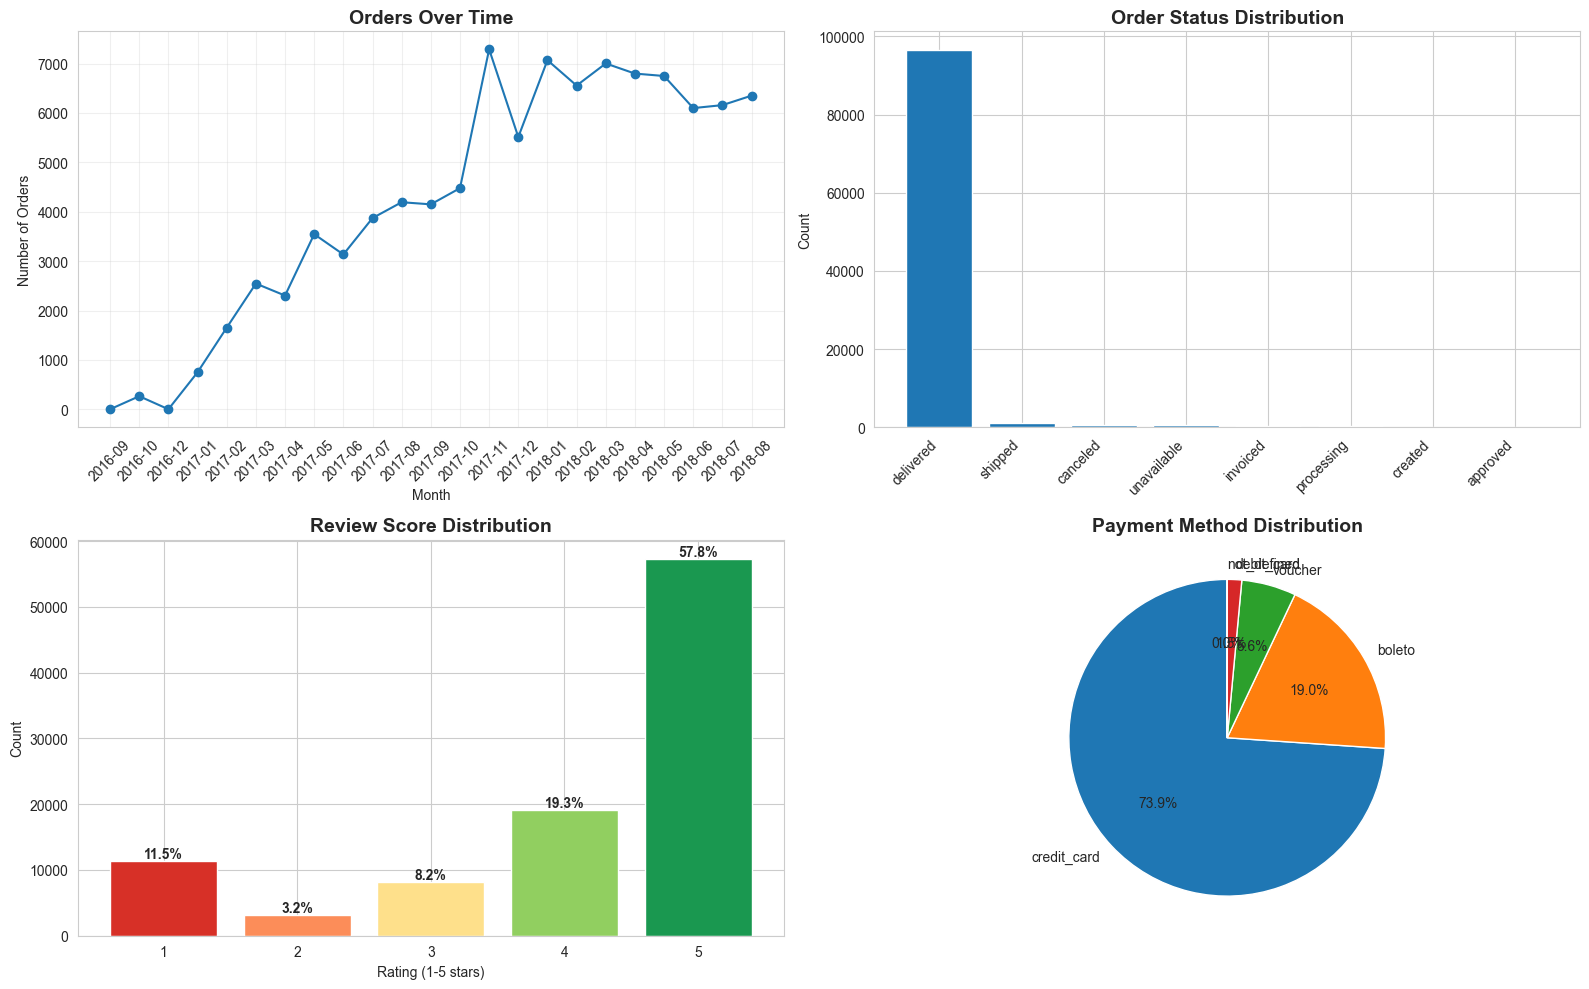

In [17]:
# Orders over time
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Orders over time
orders_completed = orders[orders['order_status'] == 'delivered'].copy()
orders_completed['year_month'] = orders_completed['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders_completed.groupby('year_month').size()

axes[0, 0].plot(monthly_orders.index.astype(str), monthly_orders.values, marker='o')
axes[0, 0].set_title('Orders Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Order Status Distribution
status_counts = orders['order_status'].value_counts()
axes[0, 1].bar(range(len(status_counts)), status_counts.values)
axes[0, 1].set_xticks(range(len(status_counts)))
axes[0, 1].set_xticklabels(status_counts.index, rotation=45, ha='right')
axes[0, 1].set_title('Order Status Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Count')

# Plot 3: Review Score Distribution
review_counts = reviews['review_score'].value_counts().sort_index()
colors = ['#d73027', '#fc8d59', '#fee08b', '#91cf60', '#1a9850']
axes[1, 0].bar(review_counts.index, review_counts.values, color=colors)
axes[1, 0].set_title('Review Score Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Rating (1-5 stars)')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticks([1, 2, 3, 4, 5])

# Add percentages on bars
for i, (score, count) in enumerate(review_counts.items()):
    pct = count / review_counts.sum() * 100
    axes[1, 0].text(score, count, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 4: Payment Type Distribution
payment_counts = payments['payment_type'].value_counts()
axes[1, 1].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Payment Method Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

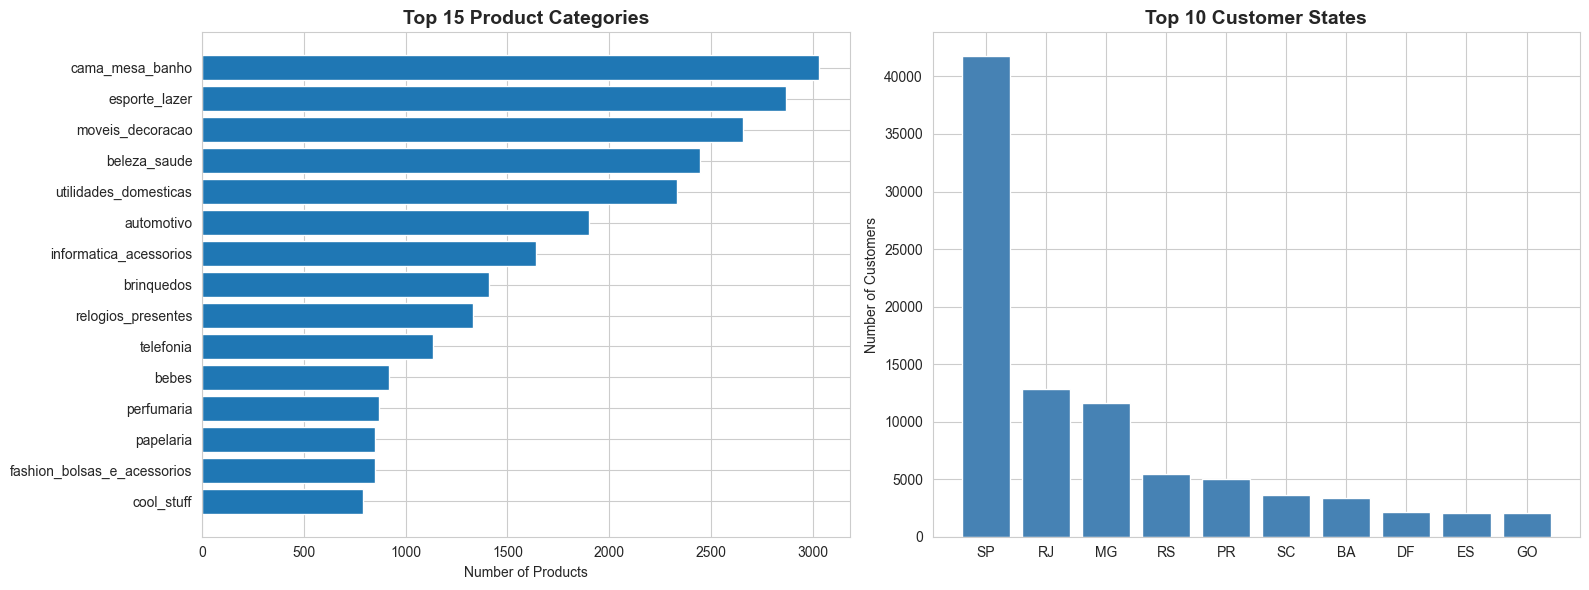

In [18]:
# Top product categories and customer states
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 product categories
top_categories = products['product_category_name'].value_counts().head(15)
axes[0].barh(range(len(top_categories)), top_categories.values)
axes[0].set_yticks(range(len(top_categories)))
axes[0].set_yticklabels(top_categories.index)
axes[0].set_xlabel('Number of Products')
axes[0].set_title('Top 15 Product Categories', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Top 10 customer states
top_states = customers['customer_state'].value_counts().head(10)
axes[1].bar(range(len(top_states)), top_states.values, color='steelblue')
axes[1].set_xticks(range(len(top_states)))
axes[1].set_xticklabels(top_states.index)
axes[1].set_ylabel('Number of Customers')
axes[1].set_title('Top 10 Customer States', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Key Statistics Summary

In [20]:
print("="*60)
print("KEY STATISTICS SUMMARY")
print("="*60)

print("\n📊 DATASET SIZES:")
print(f"   Customers: {len(customers):,}")
print(f"   Unique Customers: {customers['customer_unique_id'].nunique():,}")
print(f"   Orders: {len(orders):,}")
print(f"   Order Items: {len(order_items):,}")
print(f"   Products: {len(products):,}")
print(f"   Sellers: {len(sellers):,}")
print(f"   Reviews: {len(reviews):,}")

print("\n💰 FINANCIAL:")
total_revenue = order_items['price'].sum()
total_freight = order_items['freight_value'].sum()
print(f"   Total Revenue: R$ {total_revenue:,.2f}")
print(f"   Total Freight: R$ {total_freight:,.2f}")
print(f"   Avg Order Value: R$ {order_items.groupby('order_id')['price'].sum().mean():.2f}")

print("\n⭐ REVIEWS:")
print(f"   Average Rating: {reviews['review_score'].mean():.2f} / 5.00")
print(f"   5-Star Reviews: {(reviews['review_score'] == 5).sum() / len(reviews) * 100:.1f}%")
print(f"   1-Star Reviews: {(reviews['review_score'] == 1).sum() / len(reviews) * 100:.1f}%")

print("\n📦 ORDERS:")
print(f"   Delivered: {(orders['order_status'] == 'delivered').sum():,}")
delivered_pct = (orders['order_status'] == 'delivered').sum() / len(orders) * 100
print(f"   Delivery Rate: {delivered_pct:.1f}%")
print(f"   Avg Items/Order: {order_items.groupby('order_id').size().mean():.2f}")

print("\n🛒 PRODUCTS:")
print(f"   Product Categories: {products['product_category_name'].nunique()}")
print(f"   Most Popular Category: {products['product_category_name'].value_counts().index[0]}")

print("\n💳 PAYMENTS:")
print(f"   Credit Card: {(payments['payment_type'] == 'credit_card').sum() / len(payments) * 100:.1f}%")
print(f"   Avg Installments: {payments['payment_installments'].mean():.1f}")

print("\n🌍 GEOGRAPHY:")
print(f"   States Covered: {customers['customer_state'].nunique()}")
print(f"   Cities Covered: {customers['customer_city'].nunique():,}")
print(f"   Top State: {customers['customer_state'].value_counts().index[0]}")

print("\n" + "="*60)
print("✅ DATA EXPLORATION COMPLETE!")
print("="*60)

KEY STATISTICS SUMMARY

📊 DATASET SIZES:
   Customers: 99,441
   Unique Customers: 96,096
   Orders: 99,441
   Order Items: 112,650
   Products: 32,951
   Sellers: 3,095
   Reviews: 99,224

💰 FINANCIAL:
   Total Revenue: R$ 13,591,643.70
   Total Freight: R$ 2,251,909.54
   Avg Order Value: R$ 137.75

⭐ REVIEWS:
   Average Rating: 4.09 / 5.00
   5-Star Reviews: 57.8%
   1-Star Reviews: 11.5%

📦 ORDERS:
   Delivered: 96,478
   Delivery Rate: 97.0%
   Avg Items/Order: 1.14

🛒 PRODUCTS:
   Product Categories: 73
   Most Popular Category: cama_mesa_banho

💳 PAYMENTS:
   Credit Card: 73.9%
   Avg Installments: 2.9

🌍 GEOGRAPHY:
   States Covered: 27
   Cities Covered: 4,119
   Top State: SP

✅ DATA EXPLORATION COMPLETE!


## Next Steps

1. **Data Cleaning** (Notebook 02)
   - Handle missing values
   - Fix data types
   - Remove duplicates
   - Create master dataset

2. **Customer Analysis** (Notebook 03)
   - RFM segmentation
   - Customer lifetime value
   - Repeat purchase analysis

3. **Product Analysis** (Notebook 04)
   - Category performance
   - Profitability analysis
   - Product recommendations

4. **Delivery Analysis** (Notebook 05)
   - Delivery time analysis
   - Geographic patterns
   - Impact on ratings